#**PREDICTION**

In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = '/content/city_day.csv'
data = pd.read_csv(file_path)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
data.isnull().sum()*100/len(data)

,0
City,0.000000
Date,0.000000
PM2.5,15.570079
PM10,37.723071
NO,12.129626
NO2,12.139785
NOx,14.171549
NH3,34.973418
CO,6.972334
SO2,13.050692


In [5]:
data.drop('Xylene',axis=1,inplace=True)

In [6]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,2049.000000


In [8]:
cols_name = ['City','Date','AQI','AQI_Bucket']

In [9]:
for col in data.columns:
  if col not in cols_name:
    data[col] = data[col].fillna(data[col].mean())

In [10]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,NaN,NaN


In [11]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [12]:
def aqi_calculation(row):

  breakpoints = {
        'PM2.5': [[0, 30], [31, 60], [61, 90], [91, 120], [121, 250]],
        'PM10': [[0, 50], [51, 100], [101, 250], [251, 350], [351, 430]],
        'SO2': [[0, 40], [41, 80], [81, 380], [381, 800], [801, 1600]],
        'NO2': [[0, 40], [41, 80], [81, 380], [381, 800], [801, 1600]],
        'CO': [[0, 1], [1.1, 2], [2.1, 10], [10.1, 15], [15.1, 20]],
        'O3': [[0, 50], [51, 100], [101, 168], [169, 208], [209, 748]]
    }

  aqi_categories = ['Good', 'Satisfactory', 'Moderately polluted', 'Poor', 'Very poor', 'Severe']

  pollutant_aqis = {}
  for pollutant in breakpoints:
      concentration = row[pollutant]
      if pd.notna(concentration):
          for i, (lower, upper) in enumerate(breakpoints[pollutant]):
              if lower <= concentration <= upper:
                  aqi = ((i + 1) * 50 - i * 50) / (upper - lower) * (concentration - lower) + i * 50
                  pollutant_aqis[pollutant] = aqi
                  break

  if pollutant_aqis:
        aqi = max(pollutant_aqis.values())
        aqi_category = aqi_categories[int(aqi // 50)] if aqi <= 300 else aqi_categories[-1]
        return aqi, aqi_category
  else:
      return None, None


data[['AQI', 'AQI_Bucket']] = data.apply(aqi_calculation, axis=1, result_type='expand')



In [13]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,124.149254,Moderately polluted
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,111.121686,Moderately polluted
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,223.469388,Very poor
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,111.121686,Moderately polluted
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,111.121686,Moderately polluted


In [14]:
data['AQI'].head()

,AQI
0,124.149254
1,111.121686
2,223.469388
3,111.121686
4,111.121686


In [15]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene']
X = data[features]
Y = data['AQI']

In [16]:
from sklearn.preprocessing import StandardScaler
SD = StandardScaler()
X = SD.fit_transform(X)


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [19]:
from sklearn.metrics import mean_squared_error

regression_models = [('LR',LinearRegression()),
          ('DTR',DecisionTreeRegressor()),
          ('SVR',SVR()),
          ('KNN-R',KNeighborsRegressor())
]

for model_name ,model in regression_models:
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  mse = mean_squared_error(Y_pred,Y_test)
  print(f'{model_name}:{mse}')


LR:979.0026466804566
DTR:19.88675048606202
SVR:378.59419461753185
KNN-R:202.89942182926808


In [20]:
def user_input_func():

  features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene']
  input_values = []
  for feature in features:
    while True:
      try:
        input_value = float(input(f"Enter the value for {feature} :"))
        input_values.append(input_value)
        break
      except ValueError:
        print("Please enter a vaild input")

  return np.array(input_values)

user_input = user_input_func()
user_input_reshape = user_input.reshape(1,-1)
user_input_SD = SD.transform(user_input_reshape)

Enter the value for PM2.5 :0
Enter the value for PM10 :0
Enter the value for NO :0
Enter the value for NO2 :0
Enter the value for NOx :0
Enter the value for NH3 :0
Enter the value for CO :0
Enter the value for SO2 :0
Enter the value for O3 :133.36
Enter the value for Benzene :0
Enter the value for Toluene :0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,124.149254,Moderately polluted
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,111.121686,Moderately polluted
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,223.469388,Very poor
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,111.121686,Moderately polluted
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,111.121686,Moderately polluted


In [22]:
output_list = []
for model_name ,model in regression_models:
  user_pred = model.predict(user_input_SD)
  output_list.append(user_pred)
  print(f'{model_name}:AQI{user_pred}')


LR:AQI[55.59085108]
DTR:AQI[50.76530612]
SVR:AQI[115.36732396]
KNN-R:AQI[117.70447761]


In [23]:
output_array = np.array(output_list)
output_array.mean()

np.float64(84.85698969436604)

#**CLASSIFICATION**

In [24]:
import numpy as np
import pandas as pd


In [25]:
file_path = '/content/city_day.csv'
aqi_data = pd.read_csv(file_path)
aqi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [26]:
aqi_data.fillna(0,inplace=True)

In [27]:
aqi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,133.36,0.00,0.02,0.00,0.0,0
1,Ahmedabad,2015-01-02,0.0,0.0,0.97,15.69,16.46,0.0,0.97,24.55,34.06,3.68,5.50,3.77,0.0,0
2,Ahmedabad,2015-01-03,0.0,0.0,17.40,19.30,29.70,0.0,17.40,29.07,30.70,6.80,16.40,2.25,0.0,0
3,Ahmedabad,2015-01-04,0.0,0.0,1.70,18.48,17.97,0.0,1.70,18.59,36.08,4.43,10.14,1.00,0.0,0
4,Ahmedabad,2015-01-05,0.0,0.0,22.10,21.42,37.76,0.0,22.10,39.33,39.31,7.01,18.89,2.78,0.0,0


In [28]:
def aqi_calculation(row):

  breakpoints = {
        'PM2.5': [[0, 30], [31, 60], [61, 90], [91, 120], [121, 250]],
        'PM10': [[0, 50], [51, 100], [101, 250], [251, 350], [351, 430]],
        'SO2': [[0, 40], [41, 80], [81, 380], [381, 800], [801, 1600]],
        'NO2': [[0, 40], [41, 80], [81, 380], [381, 800], [801, 1600]],
        'CO': [[0, 1], [1.1, 2], [2.1, 10], [10.1, 15], [15.1, 20]],
        'O3': [[0, 50], [51, 100], [101, 168], [169, 208], [209, 748]]
    }

  aqi_categories = ['Good', 'Satisfactory', 'Moderately polluted', 'Poor', 'Very poor', 'Severe']

  pollutant_aqis = {}
  for pollutant in breakpoints:
      concentration = row[pollutant]
      if pd.notna(concentration):
          for i, (lower, upper) in enumerate(breakpoints[pollutant]):
              if lower <= concentration <= upper:
                  aqi = ((i + 1) * 50 - i * 50) / (upper - lower) * (concentration - lower) + i * 50
                  pollutant_aqis[pollutant] = aqi
                  break

  if pollutant_aqis:
        aqi = max(pollutant_aqis.values())
        aqi_category = aqi_categories[int(aqi // 50)] if aqi <= 300 else aqi_categories[-1]
        return aqi, aqi_category
  else:
      return None, None


aqi_data[['AQI', 'AQI_Bucket']] = aqi_data.apply(aqi_calculation, axis=1, result_type='expand')



In [29]:
aqi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,133.36,0.00,0.02,0.00,124.149254,Moderately polluted
1,Ahmedabad,2015-01-02,0.0,0.0,0.97,15.69,16.46,0.0,0.97,24.55,34.06,3.68,5.50,3.77,48.500000,Good
2,Ahmedabad,2015-01-03,0.0,0.0,17.40,19.30,29.70,0.0,17.40,29.07,30.70,6.80,16.40,2.25,223.469388,Very poor
3,Ahmedabad,2015-01-04,0.0,0.0,1.70,18.48,17.97,0.0,1.70,18.59,36.08,4.43,10.14,1.00,83.333333,Satisfactory
4,Ahmedabad,2015-01-05,0.0,0.0,22.10,21.42,37.76,0.0,22.10,39.33,39.31,7.01,18.89,2.78,49.162500,Good


In [30]:
aqi_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [42]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
X = aqi_data[features]
Y = aqi_data['AQI_Bucket']

In [43]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LE = LabelEncoder()
Y = LE.fit_transform(Y)
original_label = LE.classes_

SD = StandardScaler()
X = SD.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [46]:
models = [
    ('DTC',DecisionTreeClassifier()),
    ('KNN',KNeighborsClassifier()),
    ('RFC',RandomForestClassifier()),
    ('SVC',SVC())
    ]

for model_name, model in models:
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_pred)
  print(f'{model_name}:Accuracy = {accuracy}')

DTC:Accuracy = 0.9918740477399696
KNN:Accuracy = 0.8339258506856272
RFC:Accuracy = 0.9883189436262062
SVC:Accuracy = 0.866768241069917


In [47]:
classifier_model = DecisionTreeClassifier()

In [48]:
classifier_model.fit(X_train,Y_train)

DecisionTreeClassifier()

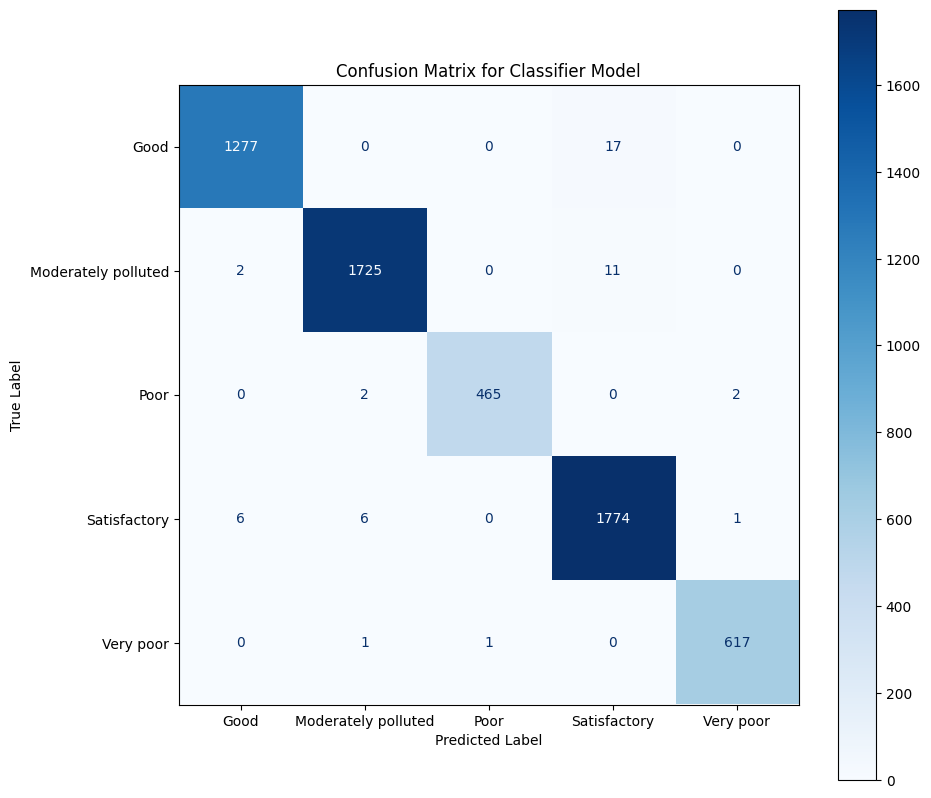

In [49]:
## Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test data
Y_pred_classifier = classifier_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classifier)

# Get the class labels (original string labels)
class_labels = original_label

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Classifier Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.5, 0.875, 'x[1] <= 0.3\ngini = 0.754\nsamples = 23624\nvalue = [5312, 6887, 1841, 7267, 2317]'),
 Text(0.25, 0.625, 'x[0] <= -0.596\ngini = 0.689\nsamples = 16781\nvalue = [5301, 2251, 793, 7243, 1193]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[6] <= -0.148\ngini = 0.393\nsamples = 5709\nvalue = [4295, 208, 47, 1135, 24]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[0] <= 0.063\ngini = 0.638\nsamples = 11072\nvalue = [1006, 2043, 746, 6108, 1169]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[0] <= 0.53\ngini = 0.491\nsamples = 6843\nvalue = [11, 4636, 1048, 24, 1124]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 1.937\ngini = 0.098\nsamples = 4788\nvalue = [5, 4543, 173, 10, 57]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[0] <= 0.989\ngini = 0.547\nsamples = 2055\nvalue = [6, 

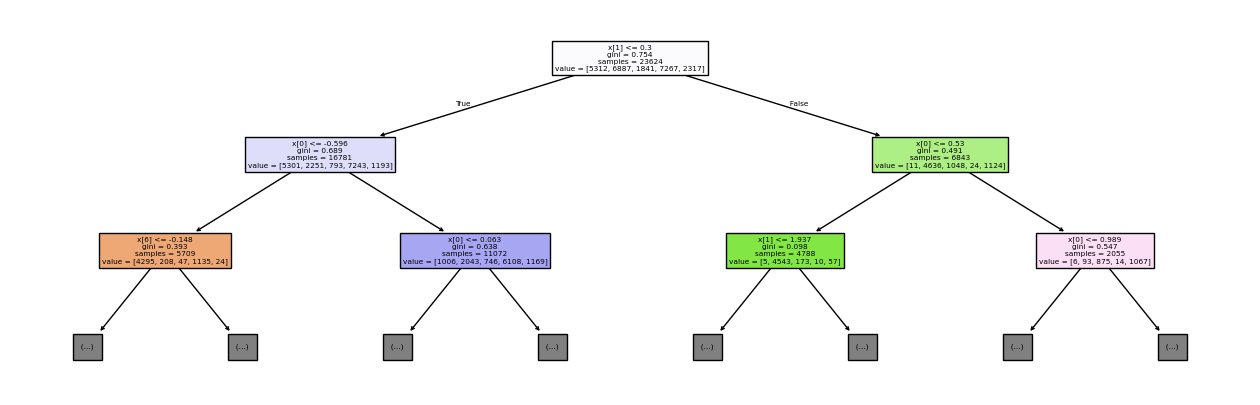

In [51]:
plt.figure(figsize=(16,5))
tree.plot_tree(classifier_model,filled=True,max_depth=2)

In [52]:
def user_input_func():

  features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
  input_values = []

  for feature in features:
    while True:
      try:
        value = float(input(f"Enter the value for {feature}: "))
        input_values.append(value)
        break
      except ValueError:
        print("Please Enter a valid input")

  return np.array(input_values)

user_input = user_input_func()
reshape_user_input =user_input.reshape(1,-1)
user_input_SD = SD.transform(reshape_user_input)
prediction = []
for model_name, model in models:
  Y_pred = model.predict(user_input_SD)
  prediction.append(Y_pred)

print(prediction)



Enter the value for PM2.5: 0
Enter the value for PM10: 0
Enter the value for NO: 0
Enter the value for NO2: 0
Enter the value for NOx: 0
Enter the value for NH3: 0
Enter the value for CO: 0
Enter the value for SO2: 0
Enter the value for O3: 133.36
[array([1]), array([1]), array([0]), array([1])]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
aqi_data.head(1)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,133.36,0.0,0.02,0.0,124.149254,Moderately polluted


In [54]:
def findMostFrequent(nums):
    countMap = {}
    maxCount = 0
    mostFrequent = None

    for num in nums:
        num = tuple(num)
        if num in countMap:
            countMap[num] += 1
        else:
            countMap[num] = 1

        if countMap[num] > maxCount:
            maxCount = countMap[num]
            mostFrequent = num

    return mostFrequent

result = findMostFrequent(prediction)
print(result)
output = original_label[result]
print(output)

(np.int64(1),)
Moderately polluted
